In [61]:
import os
from scipy.io import wavfile
from src.utils.notebook import visualize_audio 
from src.utils import augment
from src.utils.notebook import Sampler

In [58]:
# from src.datasets import SpeechEvaluationDataset
# z = SpeechEvaluationDataset()
# z.upload_s3_data()

Uploading speech_evaluation data to S3


In [ ]:
# DATA_DIR = 'data/noisy_speech/training_set_clean'
# FILENAMES = [
#     'p226_005.wav',
#     'p282_024.wav',
#     'p276_023.wav',
#     'p226_021.wav',
# ]
# PATHS = [os.path.join(DATA_DIR, f) for f in FILENAMES]

In [ ]:
# arrs = []
# for path in PATHS:
#     _, arr = wavfile.read(path)
#     arrs.append(arr)

In [ ]:
# # sample = arrs[1]

# for idx, arr in enumerate(arrs):
#     arr = augment.mask_low_freq(arr, mask_freq=500)
#     arr = augment.mask_high_freq(arr, mask_freq=2500)
#     arr = augment.add_noise(arr, noise_stdev=1e-4)
    
#     wavfile.write(f"phone.{idx}.wav", 16000, arr)


In [116]:
import os
import subprocess
from urllib.parse import urlparse
import requests

# URL = 'http://hwcdn.libsyn.com/p/6/2/4/624d98a205e61696/Episode6.mp3?c_id=16277365&cs_id=16277365&expiration=1573280793&hwt=d38322eec81b7584389a6b9b6a92159a'
URL = 'https://edge2.pod.npr.org/anon.npr-mp3/npr/indicator/2019/10/20191015_indicator_191015_nobel_w_kremer_final_2.mp3/20191015_indicator_191015_nobel_w_kremer_final_2.mp3_6aa64c2a30f46dd80902d0b6297be15e_8556433.mp3?orgId=1&topicId=1006&d=535&p=510325&story=770455768&t=podcast&e=770455768&siteplayer=true&size=8556423&awCollectionId=510325&awEpisodeId=770455768&dl=1&hash_redirect=1&x-total-bytes=8556433&x-ais-classified=download&listeningSessionID=0CD_382_320__da2f17ce46ff85fdbcd9578378298c69bd0f3be4'
os.makedirs("data/downloads", exist_ok=True)
url_path = urlparse(URL).path
filename = os.path.basename(url_path)
file_path = os.path.join("data/downloads", filename)
wav_file_path = file_path.replace(".mp3", ".wav")
if not os.path.exists(wav_file_path):
    with open(file_path, "wb") as f:
        resp = requests.get(URL, allow_redirects=True)
        f.write(resp.content)

    cmd = f"sox {file_path} -r 16000 -b 32 -e float {wav_file_path}"
    subprocess.run(args=[cmd], shell=True, check=True)



In [153]:
_, arr = wavfile.read(wav_file_path)
arr = arr[:, 0]

START = 55 * 2**16
WIDTH = 5 * 2**16

# START = 15 * 2**16
# WIDTH = 2 * 2**16


arr = arr[START:START + WIDTH]

# wavfile.write('podcast.5.wav', 16000, arr)

filtered


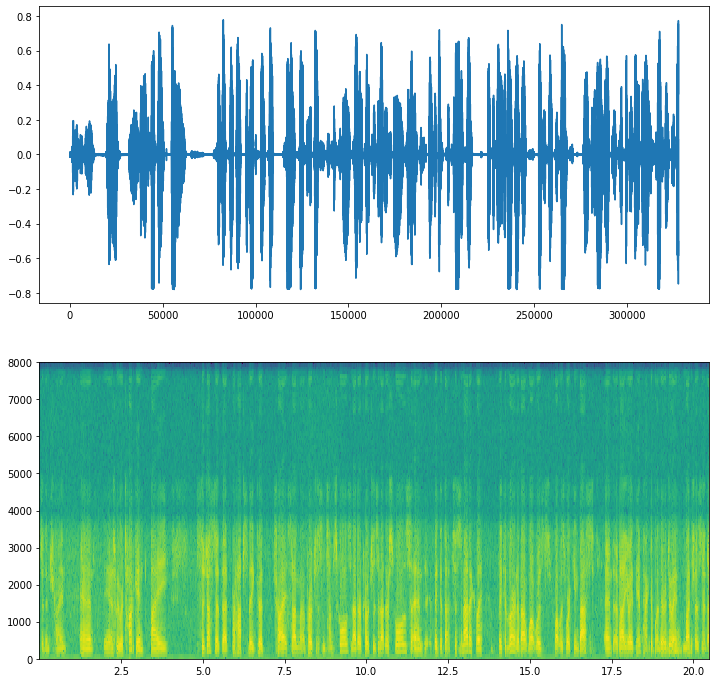

In [152]:
visualize_audio(arr, 'filtered')

In [ ]:
# visualize_audio(sample, 'original')